In [282]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import linear_model
import statsmodels.api as sm

In [65]:
BvF = pd.read_csv('blades_flakes_datasheet - weights.csv')
BvFarr = BvF.to_numpy()
mass = BvFarr[:, 3]
cut = BvFarr[:, 4]
CMratio = []
for i in range(len(mass)):
    ratio = np.float64(cut[i])/mass[i]
    CMratio.append(ratio)
CMFinal = pd.DataFrame(CMratio, columns = ['ce/m ratio'])
CMFinal.to_clipboard()
print(CMFinal)

      ce/m ratio
0       1.534000
1       0.796250
2       0.642857
3       0.127957
4       0.298750
...          ...
1212    0.181857
1213    2.641481
1214    1.644697
1215    2.609630
1216    0.228727

[1217 rows x 1 columns]


In [66]:
Trip = pd.read_csv('blades_flakes_datasheet - flake measurements.csv')
Triparr = Trip.to_numpy()
mass = BvFarr[:, 3]
edge = 0.1*(Triparr[2, 1:] + Triparr[3, 1:] + Triparr[4, 1:])
TripRatio = []
for i in range(len(mass)):
    ratio2 = np.float64(edge[i])/mass[i]
    TripRatio.append(ratio2)
TripFinal = pd.DataFrame(TripRatio, columns = ['ce/m ratio'])
EdgeFinal = pd.DataFrame(edge, columns = ['edge length'])
print(TripFinal.shape)


(1217, 1)


In [288]:
#TripFinal.to_clipboard()
#EdgeFinal.to_clipboard()
Diff = CMFinal.subtract(TripFinal)
Frames = [CMFinal, TripFinal, Diff]
Err = pd.concat(Frames, axis = 1)
Err.columns= ['FullMeasure', 'TripMeasure', 'Error']
Points = Err.dropna('index')
print(Points)

      FullMeasure  TripMeasure     Error
189      4.235000     5.502500 -1.267500
190      6.140000     6.263125 -0.123125
191     10.890000    12.310000 -1.420000
192      6.974615     7.509231 -0.534615
193      3.100682     3.513182 -0.412500
...           ...          ...       ...
1212     0.181857     0.330649 -0.148792
1213     2.641481     2.715926 -0.074444
1214     1.644697     6.618182 -4.973485
1215     2.609630     3.241852 -0.632222
1216     0.228727     0.408506 -0.179779

[436 rows x 3 columns]


C:\Users\eitan\AppData\Local\Temp/ipykernel_6736/817100713.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  Points = Err.dropna('index')


In [283]:
x = np.array(Points['FullMeasure']).reshape(-1,1)
y = np.array(Points['TripMeasure']).reshape(-1,1)
reg = linear_model.LinearRegression()
reg.fit(x, y)
b = reg.intercept_
c = reg.coef_ 
print('Intercept: \n', b)
print('Coefficients: \n', c)

x_ = sm.add_constant(x)
 
model = sm.OLS(y, x_).fit()
predict = model.predict(x_) 
resids =  model.resid
Rsq = model.rsquared
summary = model.summary()
print(summary)

Intercept: 
 [0.38110238]
Coefficients: 
 [[1.10424213]]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     6505.
Date:                Fri, 07 Apr 2023   Prob (F-statistic):          2.32e-263
Time:                        01:52:59   Log-Likelihood:                -489.08
No. Observations:                 436   AIC:                             982.2
Df Residuals:                     434   BIC:                             990.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

Correlation: 0.937458213112552


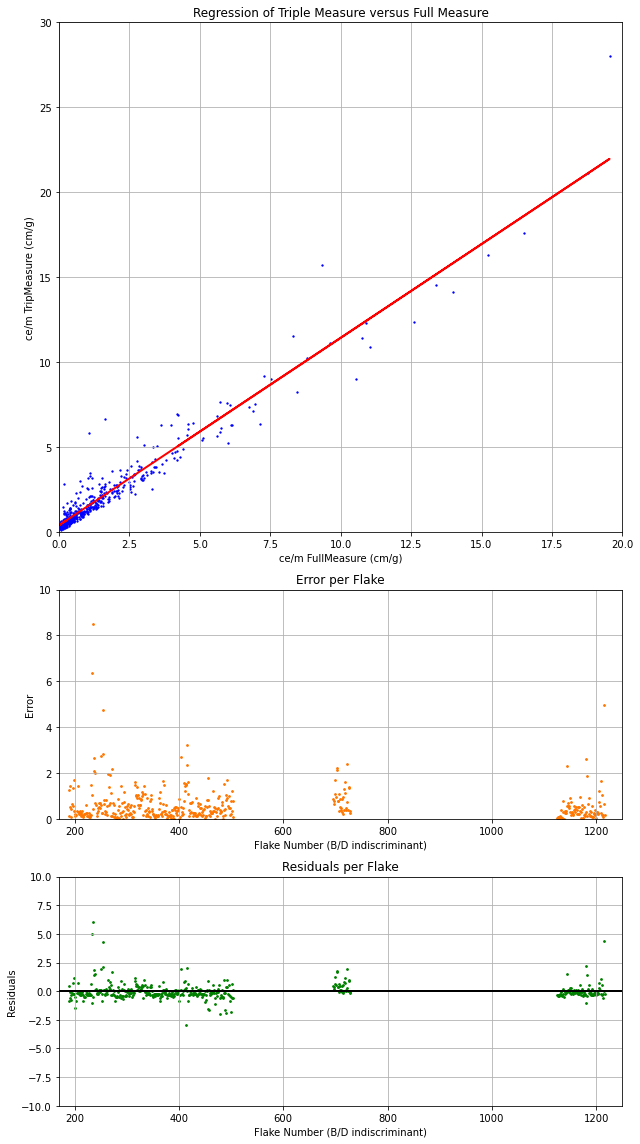

In [260]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1,figsize=(9,16), gridspec_kw={'height_ratios': [20, 9, 9]})
ax1.scatter(x, y, marker = '.', s = 7, c = 'b')
ax1.plot(x, c*x+b, linewidth = 2, c = 'r')
ax1.set_xlim(0, 20)
ax1.set_ylim(0, 30)
ax1.set_xlabel('ce/m FullMeasure (cm/g)')
ax1.set_ylabel('ce/m TripMeasure (cm/g)')
ax1.set_title('Regression of Triple Measure versus Full Measure')
ax2.scatter(Points.index, np.abs(np.array(Points['Error']).reshape(-1,1)), s = 3, c = '#ff7700')
ax2.set_xlim(170, 1250)
ax2.set_ylim(0, 10)
ax2.set_xlabel('Flake Number (B/D indiscriminant)')
ax2.set_ylabel('Error')
ax2.set_title('Error per Flake')
ax3.scatter(Points.index, resids, s = 3, c = 'g')
ax3.axhline(0, 0, 1250, linewidth = 2, c = '#000000')
ax3.set_xlim(170, 1250)
ax3.set_ylim(-10, 10)
ax3.set_xlabel('Flake Number (B/D indiscriminant)')
ax3.set_ylabel('Residuals')
ax3.set_title('Residuals per Flake')
fig.tight_layout()
ax1.grid()
ax2.grid()
ax3.grid()
print('Correlation:', Rsq)
plt.show()

In [365]:
B6_ind = (5,13,16,21,27,28,29,31,32,34,35,40,43,49,51,53,54,56,58,60,61,62,63,64,66,67,70,74,75,80,81,82,84,85,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,104,105,106,108,109,110,111,112,113,116,117,118,119,120,121,122,123,124,125,126)
B7_ind = (1,2,3,4,5,6,7,8,9,10,11,12,13,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,64,65,66,68,70,71,72,73,74,75,76,77,78,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,112,114,115,116,117,118,119,120,121,122,123,124)
B8_ind = (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128)
D1_ind = (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33)
D10_ind = (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,93)

NewInd = pd.DataFrame(B6_ind + B7_ind + B8_ind + D1_ind + D10_ind, columns = ['Indices'])
Points2 = Points.set_index(NewInd.loc[:, 'Indices'])
#print(Points2)
B6Full = Points2.iloc[0:69, 0]
B6Trip = Points2.iloc[0:69, 1]
B7Full = Points2.iloc[69:184, 0]
B7Trip = Points2.iloc[69:184, 1]
B8Full = Points2.iloc[184:311, 0]
B8Trip = Points2.iloc[184:311, 1]
D1Full = Points2.iloc[311:344, 0]
D1Trip = Points2.iloc[311:344, 1]
D10Full = Points2.iloc[344:437, 0]
D10Trip = Points2.iloc[344:437, 1]
#print(B6Full.shape+B7Full.shape+B8Full.shape+D1Full.shape+D10Full.shape)

ArrF = [B6Full, B7Full, B8Full]

ArrT = [B6Trip, B7Trip, B8Trip]

ArrF_ = [D1Full, D10Full]

ArrT_ = [D1Trip, D10Trip]


print(ArrF)

(69, 115, 127, 33, 92)
[Indices
5       4.235000
13      6.140000
16     10.890000
21      6.974615
27      3.100682
         ...    
122     1.200857
123     0.624949
124     2.993636
125     0.851897
126     1.964324
Name: FullMeasure, Length: 69, dtype: float64, Indices
1      0.350893
2      1.016620
3      5.701111
4      0.979107
5      6.080000
         ...   
120    9.621429
121    0.484856
122    0.412099
123    0.598288
124    0.336638
Name: FullMeasure, Length: 115, dtype: float64, Indices
1      0.878818
2      1.571024
3      0.790417
4      0.855793
5      0.431995
         ...   
124    3.118519
125    1.636364
126    5.068571
127    2.981333
128    2.921429
Name: FullMeasure, Length: 127, dtype: float64]


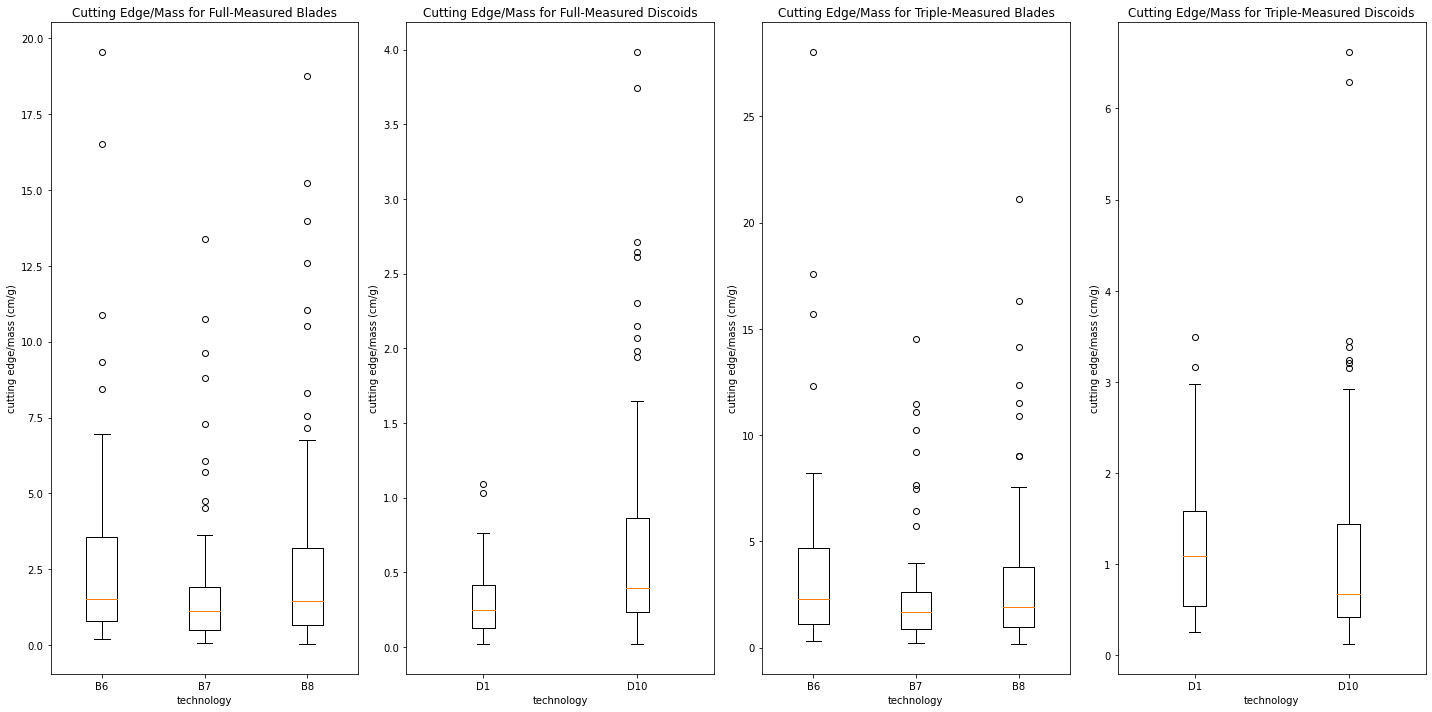

In [423]:
B = ["B6", "B7", "B8"]
D = ["D1", "D10"]
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 10))

ax1.boxplot(ArrF)
ax1.set_xticklabels(B)
ax1.set_xlabel('technology')
ax1.set_ylabel('cutting edge/mass (cm/g)')
ax1.set_title('Cutting Edge/Mass for Full-Measured Blades')

ax2.boxplot(ArrF_)
ax2.set_xticklabels(D)
ax2.set_xlabel('technology')
ax2.set_ylabel('cutting edge/mass (cm/g)')
ax2.set_title('Cutting Edge/Mass for Full-Measured Discoids')

ax3.boxplot(ArrT)
ax3.set_xticklabels(B)
ax3.set_xlabel('technology')
ax3.set_ylabel('cutting edge/mass (cm/g)')
ax3.set_title('Cutting Edge/Mass for Triple-Measured Blades')

ax4.boxplot(ArrT_)
ax4.set_xticklabels(D)
ax4.set_xlabel('technology')
ax4.set_ylabel('cutting edge/mass (cm/g)')
ax4.set_title('Cutting Edge/Mass for Triple-Measured Discoids')

fig.tight_layout()
plt.show()